In [85]:
import pandas as pd
import geopandas as gpd

# Define file paths (update these paths based on your local directory)
file_paths = {
    "listings": "data/listings.csv.gz",
    "calendar": "data/calendar.csv.gz",
    "reviews": "data/reviews.csv.gz",
    "listings_summary": "data/listings.csv",
    "reviews_summary": "data/reviews.csv",
    "neighbourhoods": "data/neighbourhoods.csv",
    "neighbourhoods_geojson": "data/neighbourhoods.geojson"
}

# Load files into individual dataframes
listings = pd.read_csv(file_paths["listings"], low_memory=False)
calendar = pd.read_csv(file_paths["calendar"], low_memory=False)
reviews = pd.read_csv(file_paths["reviews"], low_memory=False)
listings_summary = pd.read_csv(file_paths["listings_summary"], low_memory=False)
reviews_summary = pd.read_csv(file_paths["reviews_summary"], low_memory=False)
neighbourhoods = pd.read_csv(file_paths["neighbourhoods"], low_memory=False)
neighbourhoods_geojson = gpd.read_file(file_paths["neighbourhoods_geojson"])

# Display summary and head of each dataframe
dataframes = {
    "listings": listings,
    "calendar": calendar,
    "reviews": reviews,
    "listings_summary": listings_summary,
    "reviews_summary": reviews_summary,
    "neighbourhoods": neighbourhoods,
    "neighbourhoods_geojson": neighbourhoods_geojson
}

for df_name, df in dataframes.items():
    print(f"DataFrame name: {df_name}")
    print(f"Summary of {df_name}:")
    print(df.info())
    print(f"\nFirst 5 rows of {df_name}:")
    print(df.head())
    print("\n")


DataFrame name: listings
Summary of listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18230 entries, 0 to 18229
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18230 non-null  int64  
 1   listing_url                                   18230 non-null  object 
 2   scrape_id                                     18230 non-null  int64  
 3   last_scraped                                  18230 non-null  object 
 4   source                                        18230 non-null  object 
 5   name                                          18230 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         11081 non-null  object 
 8   picture_url                                   18230 non-null  object 
 9   host_id        

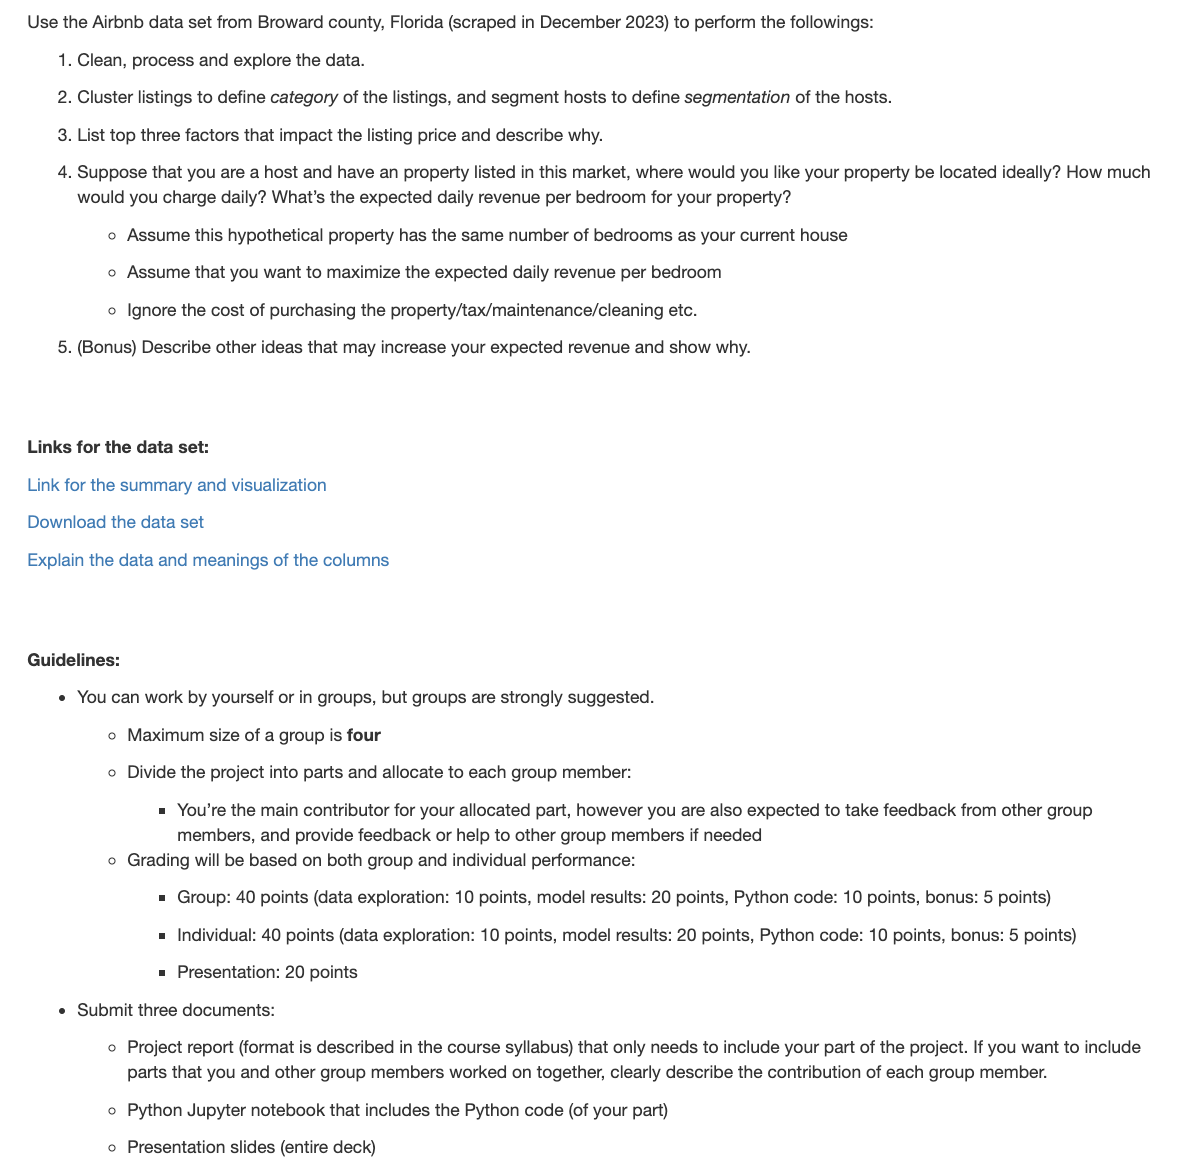

# Questions from Professor

The data is for one day, avaliable at one time. With that, there is not a ton of data. One ask is to clean the data for processing
- cluter the listings: categories of listings. There are a lot of features. Show the results, and compare models.
- do the same for the hosts. Number of properties the house has. 
- You can apply certain rules. 

- Each listing comes with a price. Most of the time these prices are constant. Find out the top 3 factors for price. 

4. This does not have a definite answer. Let us say you live in a 3 bedroom 2 bathroom house. We can use that as an estimate of the size of the proeprty. And you have the flexibility to put it anywhere in this map. Where do you want to be? 

BONUS: what else can you do if you are the investor to increase expected revenue? 

QUESTIONS: 
- how many reports? There are different rules

- Connect extrsa data like house prices. 

- There is a particular goal. If you can create a good connection, that would be good. 

- For question 4) do we seperate the value per bedroom. 70% was whole house, 20% private bedroom. 
 IT is just up to us, we can choose what works best to get most revenue.

- So we assume we have a single family home. Maximize the daily value per bedroom. The reason why is that it is normalized. If you divide that by 10, maybe the 1 bedroom condo would give better revenue. This is just a way to normalize revenue. 

## How is it going to be graded?

This is complicated, it is suggested as a group. The grading is based on the group and individual performance. group of 4 people, everyone submits their own report. 

Divide the project into a few parts. In practice, it will all be a team effort. 

If you have two team members, 2 and 3. and another do 4 and 5. 

Is there specific format for project report, same as the midterm. 
Jupyter Notebook. Presentations. 

Submit your own individual report. Ideally, it will only need to cover your part. 

For the presentaiton for the slides, you can have a whole presentation. Do it as a group. How many slides should be per group member. 

- A nice thing to do is to have each model member do different models. 

- Minutes to present (TBD). 

- When you upload files with submissions: make sure you have first and last name. 

In [86]:
# Adjust display settings to show all columns
pd.set_option('display.max_columns', None)
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,57818,https://www.airbnb.com/rooms/57818,20231225202534,2023-12-26,city scrape,Home in Hollywood · ★4.63 · 2 bedrooms · 2 bed...,NaN,Check-in window<br />After 3:00 PM<br />Edit<b...,https://a0.muscache.com/pictures/miso/Hosting-...,275948,https://www.airbnb.com/users/show/275948,Von Inc,2010-11-01,"Hollywood, FL","I love my house...the neighbors are wonderful,...",within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/1f267...,https://a0.muscache.com/im/pictures/user/1f267...,NaN,3.0,3.0,"['email', 'phone']",t,t,"Hollywood, Florida, United States",Hollywood,NaN,26.01859,-80.12430,Entire home,Entire home/apt,4,NaN,1 bath,NaN,2.0,[],$190.00,32,1125,1,32,1125,1125,31.9,1125.0,NaN,t,2,2,10,214,2023-12-26,58,1,0,2013-01-03,2023-03-31,4.63,4.69,4.61,5.00,4.97,4.88,4.71,NaN,f,2,2,0,0,0.43
1,69824,https://www.airbnb.com/rooms/69824,20231225202534,2023-12-26,city scrape,Rental unit in Hallandale · ★4.0 · 2 bedrooms ...,NaN,NaN,https://a0.muscache.com/pictures/443102/f6b94e...,351303,https://www.airbnb.com/users/show/351303,Tracy,2011-01-17,"Silver Spring, MD",NaN,within an hour,100%,50%,f,https://a0.muscache.com/im/users/351303/profil...,https://a0.muscache.com/im/users/351303/profil...,NaN,3.0,5.0,"['email', 'phone']",t,t,NaN,Hallandale Beach,NaN,25.97641,-80.12052,Entire rental unit,Entire home/apt,6,NaN,2 baths,NaN,4.0,[],$140.00,30,365,30,30,365,365,30.0,365.0,NaN,t,19,19,19,281,2023-12-26,4,2,0,2021-03-27,2023-06-03,4.00,4.50,4.00,4.75,4.75,5.00,4.50,NaN,f,2,2,0,0,0.12
2,83449,https://www.airbnb.com/rooms/83449,20231225202534,2023-12-27,city scrape,Rental unit in Dania Beach · ★4.77 · 2 bedroom...,NaN,"Residential neighborhood, less than 2 miles to...",https://a0.muscache.com/pictures/8c21bda0-5194...,454736,https://www.airbnb.com/users/show/454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL","LOCATION,LOCATION,LOCATION, NUMBER 1 ACCOMMOD...",within an hour,100%,97%,f,https://a0.muscache.com/im/users/454736/profil...,https://a0.muscache.com/im/users/454736/profil...,NaN,17.0,20.0,"['email', 'phone']",t,t,"Dania Beach, Florida, United States",Dania Beach,NaN,26.03392,-80.14201,Entire rental unit,Entire home/apt,5,NaN,1 bath,NaN,3.0,[],$127.00,7,180,7,7,180,180,7.0,180.0,NaN,t,0,1,1,1,2023-12-27,31,9,1,2011-11-01,2023-12-17,4.77,4.87,4.84,4.94,4.90,4.81,4.87,NaN,f,15,15,0,0,0.21
3,105411,https://www.airbnb.com/rooms/105411,20231225202534,2023-12-26,city scrape,Rental unit in Southwest Ranches · ★5.0 · 3 be...,NaN,"Very close to I75, one of the main highways. Y...",https://a0.muscache.com/pictures/787317/2cc18e...,532930,https://www.airbnb.com/users/show/532930,Sonia,2011-04-25,"Southwest Ranches, FL",We are 

In [87]:
listings['amenities'].unique()

array(['[]'], dtype=object)

We are going to remove obviously unnessessary columns:

**FJ Edits**  
# neighborhood_cleaned is better representation, amenities is empty
- Removed columns: ['neighborhood', 'amenities']
- Kept columns: ['instant_bookable']  
- Updated columns:  
  - bathroom_text -> bathroom column conversion improved methodology  
- Calculated columns:


In [88]:
import numpy as np

# Remove unnecessary columns
columns_to_remove = [
    "listing_url", "scrape_id", "last_scraped", "source", "description",
    "neighborhood_overview", "picture_url", "host_url", "host_about",
    "host_thumbnail_url", "host_picture_url", "host_neighbourhood", 'neighbourhood',
    "neighbourhood_group_cleansed", "bathrooms", "property_type",
    "amenities", "calendar_updated", "calendar_last_scraped",
    "license", "host_verifications", "name", "minimum_minimum_nights", 
    "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights",
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calculated_host_listings_count", 
    "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", 
    "calculated_host_listings_count_shared_rooms"
]

listings_cleaned = listings.drop(columns=columns_to_remove)

# Clean the price column by removing dollar signs and converting to numeric
listings_cleaned['price'] = listings_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

'''
Implementation handled in below cell
'''
# Extract numeric values from bathrooms_text and create a new bathrooms column
#listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.extract('(\d+(\.\d+)?)')[0].astype(float)
# Drop the old bathrooms_text column
#listings_cleaned.drop(columns=['bathrooms_text'], inplace=True)

# Calculate vacancy and booking rates
listings_cleaned['vacancy_rate_30'] = listings_cleaned['availability_30'] / 30
listings_cleaned['vacancy_rate_60'] = listings_cleaned['availability_60'] / 60
listings_cleaned['vacancy_rate_90'] = listings_cleaned['availability_90'] / 90
listings_cleaned['vacancy_rate_365'] = listings_cleaned['availability_365'] / 365


# Display the first 5 rows of the cleaned dataframe
df_columns = np.array((listings_cleaned.columns))
df_columns.sort()

print(df_columns)
listings_cleaned.head(10)

['accommodates' 'availability_30' 'availability_365' 'availability_60'
 'availability_90' 'bathrooms_text' 'bedrooms' 'beds' 'first_review'
 'has_availability' 'host_acceptance_rate' 'host_has_profile_pic'
 'host_id' 'host_identity_verified' 'host_is_superhost'
 'host_listings_count' 'host_location' 'host_name' 'host_response_rate'
 'host_response_time' 'host_since' 'host_total_listings_count' 'id'
 'instant_bookable' 'last_review' 'latitude' 'longitude' 'maximum_nights'
 'minimum_nights' 'neighbourhood_cleansed' 'number_of_reviews'
 'number_of_reviews_l30d' 'number_of_reviews_ltm' 'price'
 'review_scores_accuracy' 'review_scores_checkin'
 'review_scores_cleanliness' 'review_scores_communication'
 'review_scores_location' 'review_scores_rating' 'review_scores_value'
 'reviews_per_month' 'room_type' 'vacancy_rate_30' 'vacancy_rate_365'
 'vacancy_rate_60' 'vacancy_rate_90']


,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
0,57818,275948,Von Inc,2010-11-01,"Hollywood, FL",within an hour,100%,96%,t,3.0,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,4,1 bath,NaN,2.0,190.0,32,1125,t,2,2,10,214,58,1,0,2013-01-03,2023-03-31,4.63,4.69,4.61,5.00,4.97,4.88,4.71,f,0.43,0.066667,0.033333,0.111111,0.586301
1,69824,351303,Tracy,2011-01-17,"Silver Spring, MD",within an hour,100%,50%,f,3.0,5.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,6,2 baths,NaN,4.0,140.0,30,365,t,19,19,19,281,4,2,0,2021-03-27,2023-06-03,4.00,4.50,4.00,4.75,4.75,5.00,4.50,f,0.12,0.633333,0.316667,0.211111,0.769863
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL",within an hour,100%,97%,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,5,1 bath,NaN,3.0,127.0,7,180,t,0,1,1,1,31,9,1,2011-11-01,2023-12-17,4.77,4.87,4.84,4.94,4.90,4.81,4.87,f,0.21,0.000000,0.016667,0.011111,0.002740
3,105411,532930,Sonia,2011-04-25,"Southwest Ranches, FL",within an hour,80%,57%,f,3.0,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,5,2 baths,NaN,3.0,235.0,4,180,t,24,54,84,359,4,0,0,2012-08-06,2018-03-28,5.00,5.00,5.00,5.00,5.00,4.25,5.00,f,0.03,0.800000,0.900000,0.933333,0.983562
4,129099,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",a few days or more,36%,18%,f,9.0,19.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,5,1.5 baths,NaN,2.0,324.0,20,365,t,6,18,29,304,27,0,0,2011-08-23,2022-07-01,4.29,4.42,4.24,4.44,4.32,4.54,4.08,f,0.18,0.200000,0.300000,0.322222,0.832877
5,191160,924482,Dan,2011-08-05,"Fort Lauderdale, FL",NaN,NaN,NaN,f,2.0,3.0,t,f,Deerfield Beach,26.30707,-80.07793,Entire home/apt,4,1 bath,NaN,2.0,119.0,2,180,t,1,1,1,86,25,0,0,2012-01-04,2019-11-08,4.25,4.39,4.46,4.83,4.87,4.87,4.43,f,0.17,0.033333,0.016667,0.011111,0.235616
6,216046,964836,Gary,2011-08-13,"Hollywood, FL",within an hour,100%,93%,t,1.0,2.0,t,t,Hollywood,26.00770,-80.19722,Entire home/apt,10,3 baths,NaN,7.0,295.0,3,21,t,11,18,29,279,106,11,0,2012-01-02,2023-11-21,4.81,4.79,4.81,4.92,4.77,4.77,4.77,f,0.73,0.366667,0.300000,0.322222,0.764384
7,217990,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",a few days or more,36%,18%,f,9.0,19.0,t,t,Hollywood,25.99398,-80.11677,Entire home/apt,5,1.5 baths,NaN,1.0,250.0,10,365,t,19,49,79,354,18,0,0,2011-11-21,2018-03-19,4.93,4.88,4.81,5.00,5.00,4.88,4.81,f,0.12,0.633333,0.816667,0.877778,0.969863
8,241944,454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL",within an hour,100%,97%,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,3,1 bath,NaN,2.0,89.0,7,175,t,17,17,17,17,13,3,1,2012-07-28,2023-12-02,4.58,4.54,4.54,4.85,4.92,4.54,4.54,f,0.09,0.566667,0.283333,0.188889,0.046575
9,256386,1304156,Nicolas,2011-10-17,"Sunny Isles Beach, FL",within an hour,100%,99%,t,7.0,10.0,t,t,Hollywood,26.02584,-80.14191,Entire home/apt,4,1 bath,NaN,2.0,120.0,2,365,t,17,35,54,327,247,27,4,2012-01-02,2023-12-18,4.84,4.88,4.87,4.93,4.91,4.67,4.79,f,1.69,0.566667,0.583333,0.600000,0.895890


In [89]:
def convert_bathrooms(bathrooms_text):
    if pd.isna(bathrooms_text):
        return np.nan
    if 'half-bath' in bathrooms_text.lower():
        return 0.5
    else:
        # Extract the numeric part
        number = float(bathrooms_text.split()[0])
        return number

# Apply the function to create a new column
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].apply(convert_bathrooms)

listings_cleaned

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365,bathrooms
0,57818,275948,Von Inc,2010-11-01,"Hollywood, FL",within an hour,100%,96%,t,3.0,3.0,t,t,Hollywood,26.018590,-80.124300,Entire home/apt,4,1 bath,NaN,2.0,190.0,32,1125,t,2,2,10,214,58,1,0,2013-01-03,2023-03-31,4.63,4.69,4.61,5.00,4.97,4.88,4.71,f,0.43,0.066667,0.033333,0.111111,0.586301,1.0
1,69824,351303,Tracy,2011-01-17,"Silver Spring, MD",within an hour,100%,50%,f,3.0,5.0,t,t,Hallandale Beach,25.976410,-80.120520,Entire home/apt,6,2 baths,NaN,4.0,140.0,30,365,t,19,19,19,281,4,2,0,2021-03-27,2023-06-03,4.00,4.50,4.00,4.75,4.75,5.00,4.50,f,0.12,0.633333,0.316667,0.211111,0.769863,2.0
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL",within an hour,100%,97%,f,17.0,20.0,t,t,Dania Beach,26.033920,-80.142010,Entire home/apt,5,1 bath,NaN,3.0,127.0,7,180,t,0,1,1,1,31,9,1,2011-11-01,2023-12-17,4.77,4.87,4.84,4.94,4.90,4.81,4.87,f,0.21,0.000000,0.016667,0.011111,0.002740,1.0
3,105411,532930,Sonia,2011-04-25,"Southwest Ranches, FL",within an hour,80%,57%,f,3.0,3.0,t,t,Southwest Ranches,26.047500,-80.366680,Entire home/apt,5,2 baths,NaN,3.0,235.0,4,180,t,24,54,84,359,4,0,0,2012-08-06,2018-03-28,5.00,5.00,5.00,5.00,5.00,4.25,5.00,f,0.03,0.800000,0.900000,0.933333,0.983562,2.0
4,129099,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",a few days or more,36%,18%,f,9.0,19.0,t,t,Hollywood,25.994140,-80.118140,Entire home/apt,5,1.5 baths,NaN,2.0,324.0,20,365,t,6,18,29,304,27,0,0,2011-08-23,2022-07-01,4.29,4.42,4.24,4.44,4.32,4.54,4.08,f,0.18,0.200000,0.300000,0.322222,0.832877,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225,1053585835624760405,156208082,Albert Milton,2017-10-25,"Aventura, FL",within an hour,100%,100%,f,71.0,115.0,t,t,Hollywood,26.006910,-80.146273,Entire home/apt,15,2 baths,NaN,7.0,407.0,1,365,t,27,56,86,266,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,0.900000,0.933333,0.955556,0.728767,2.0
18226,1053681377817512389,81648943,Jennifer,2016-07-04,"Las Vegas, NV",within an hour,100%,99%,f,46.0,56.0,t,t,Dania Beach,26.061497,-80.205147,Private room,3,2 baths,NaN,3.0,42.0,1,28,t,25,55,85,85,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,0.833333,0.916667,0.944444,0.232877,2.0
18227,1053723605446476408,447235921,Traverse,2022-02-28,NaN,within an hour,100%,66%,f,601.0,713.0,t,t,Hallandale Beach,25.986199,-80.119695,Entire home/apt,6,1 bath,NaN,4.0,297.0,1,365,t,25,55,85,175,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.833333,0.916667,0.944444,0.479452,1.0
18228,1053723856792063092,447235921,Traverse,2022-02-28,NaN,within an hour,100%,66%,f,601.0,713.0,t,t,Hollywood,25.987830,-80.119696,Entire home/apt,6,1 bath,NaN,4.0,297.0,1,365,t,21,51,81,171,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.700000,0.850000,0.900000,0.468493,1.0


# Adding Reviews data

To create a new column with sentiment scores for the reviews, we can use a sentiment analysis library such as TextBlob or VADER. These libraries provide tools to analyze the sentiment of text and return a score. Here’s how you can do it:

In [90]:
%pip install -q textblob vaderSentiment

from textblob import TextBlob

# Calculate sentiment scores for reviews
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

reviews['sentiment'] = reviews['comments'].apply(lambda x: get_sentiment(str(x)))

# Merge sentiment scores with listings data
sentiment_by_listing = reviews.groupby('listing_id')['sentiment'].mean().reset_index()
listings_cleaned = listings_cleaned.merge(sentiment_by_listing, left_on='id', right_on='listing_id', how='left')

reviews.head()


DEPRECATION: Loading egg at /Users/fjohnson35/anaconda3/lib/python3.11/site-packages/mask_rcnn_tf2-1.5.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/fjohnson35/anaconda3/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,57818,3247141,2013-01-03,4203034,Gaurav,It was the first trip to Miami for most of us ...,0.332544
1,57818,3402974,2013-01-23,252741,Karen & Adam,Wonderful! Janice was a pleasure to work with...,0.288095
2,57818,3427358,2013-01-28,4539300,Seth,Janice was a wonderful host. Very accommodati...,0.267857
3,57818,3483222,2013-02-05,2171166,Claude,Janice is an fine host. She was very prompt on...,0.381636
4,57818,3514314,2013-02-11,435179,Sean,"Nice place in an excellent, peaceful and famil...",0.494048


       id  host_id                  host_name  host_since  \
0   57818   275948                    Von Inc  2010-11-01   
1   69824   351303                      Tracy  2011-01-17   
2   83449   454736  Jon,  Mary Pop Apartments  2011-03-21   
3  105411   532930                      Sonia  2011-04-25   
4  129099   637272                     Bianca  2011-05-28   

             host_location  host_response_time host_response_rate  \
0            Hollywood, FL      within an hour               100%   
1        Silver Spring, MD      within an hour               100%   
2          Dania Beach, FL      within an hour               100%   
3    Southwest Ranches, FL      within an hour                80%   
4  Buenos Aires, Argentina  a few days or more                36%   

  host_acceptance_rate host_is_superhost  host_listings_count  \
0                  96%                 t                  3.0   
1                  50%                 f                  3.0   
2                  97% 

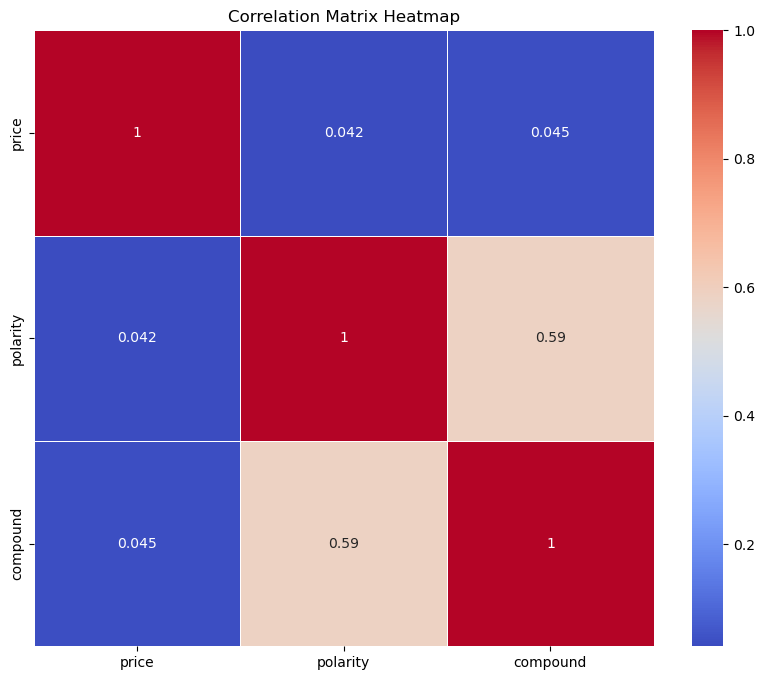

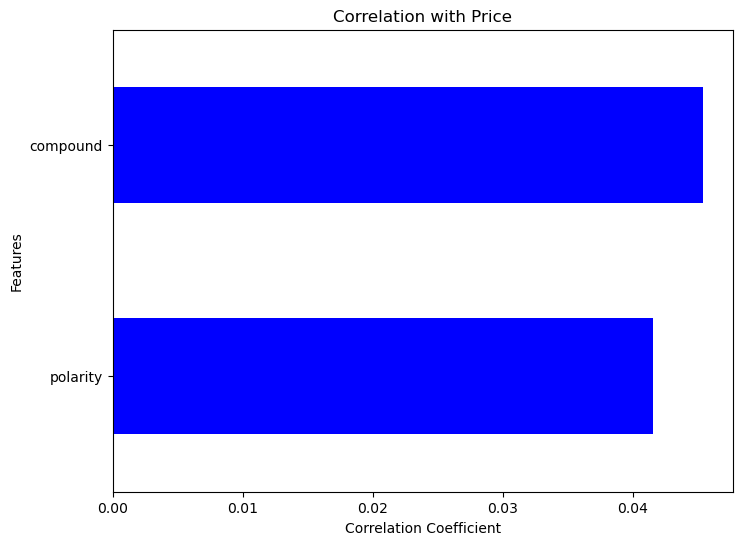

In [91]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores using TextBlob and VADER
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)

reviews['polarity'] = reviews['comments'].apply(lambda x: get_sentiment(str(x)))
vader_sentiments = reviews['comments'].apply(lambda x: get_vader_sentiment(str(x)))
vader_df = pd.DataFrame(vader_sentiments.tolist())
reviews = pd.concat([reviews, vader_df], axis=1)

# Merge sentiment scores with listings data
sentiment_by_listing = reviews.groupby('listing_id').agg({
    'polarity': 'mean',
    'compound': 'mean'
}).reset_index()

# Merge the sentiment metrics with listings_cleaned to create reviews_listings
reviews_listings = listings_cleaned.merge(sentiment_by_listing, left_on='id', right_on='listing_id', how='left')

# Display the first few rows of reviews_listings
print(reviews_listings.head())

# Calculate the correlation matrix for only numeric columns
correlation_matrix = reviews_listings[['price', 'polarity', 'compound']].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display the correlation matrix for price with other numerical columns as a bar plot
plt.figure(figsize=(8, 6))
correlation_matrix['price'].drop('price').sort_values().plot(kind='barh', color='blue')
plt.title('Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [92]:
# Calculate the correlation matrix for only numeric columns
correlation_matrix = listings_cleaned.select_dtypes(include='number').corr()

# Display the correlation matrix for price with other numerical columns
print(correlation_matrix['price'])


id                             0.001230
host_id                       -0.000203
host_listings_count           -0.003733
host_total_listings_count     -0.002942
latitude                      -0.016896
longitude                      0.042550
accommodates                   0.242030
bedrooms                       0.429328
beds                           0.219146
price                          1.000000
minimum_nights                -0.015488
maximum_nights                 0.035181
availability_30                0.051428
availability_60                0.053076
availability_90                0.052001
availability_365               0.062235
number_of_reviews             -0.033421
number_of_reviews_ltm         -0.037035
number_of_reviews_l30d        -0.044152
review_scores_rating           0.033697
review_scores_accuracy         0.029167
review_scores_cleanliness      0.028909
review_scores_checkin          0.020037
review_scores_communication    0.020489
review_scores_location         0.037149


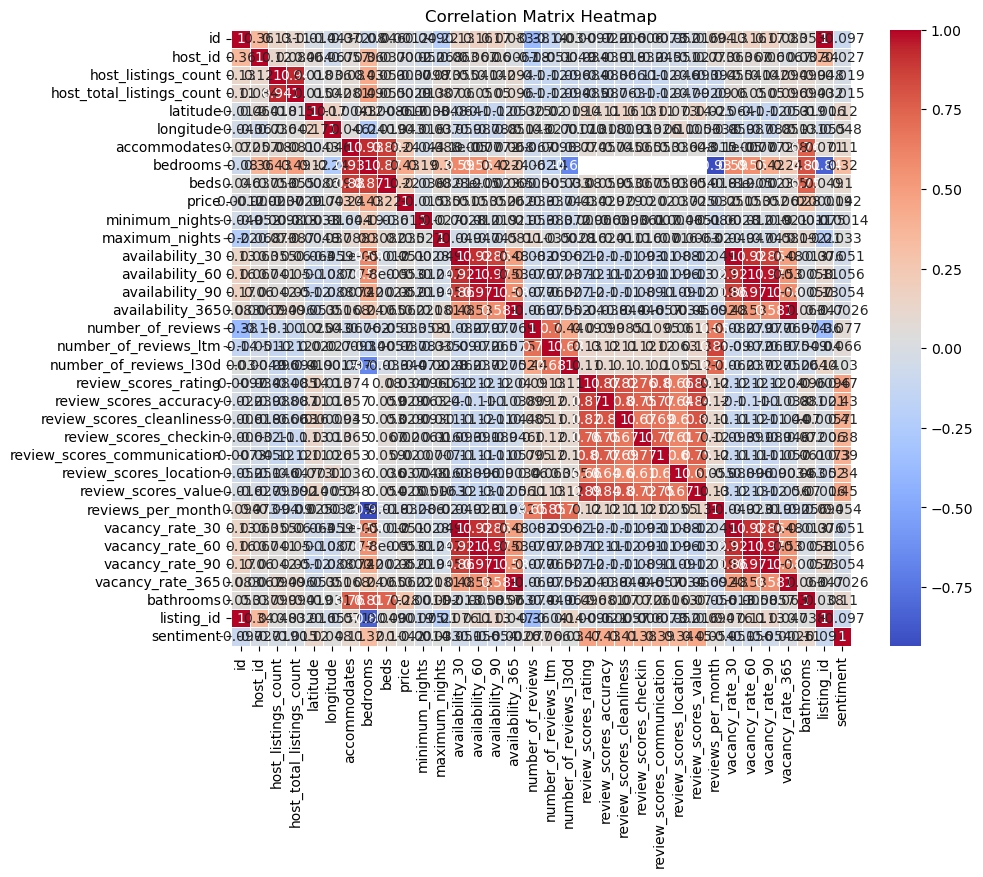

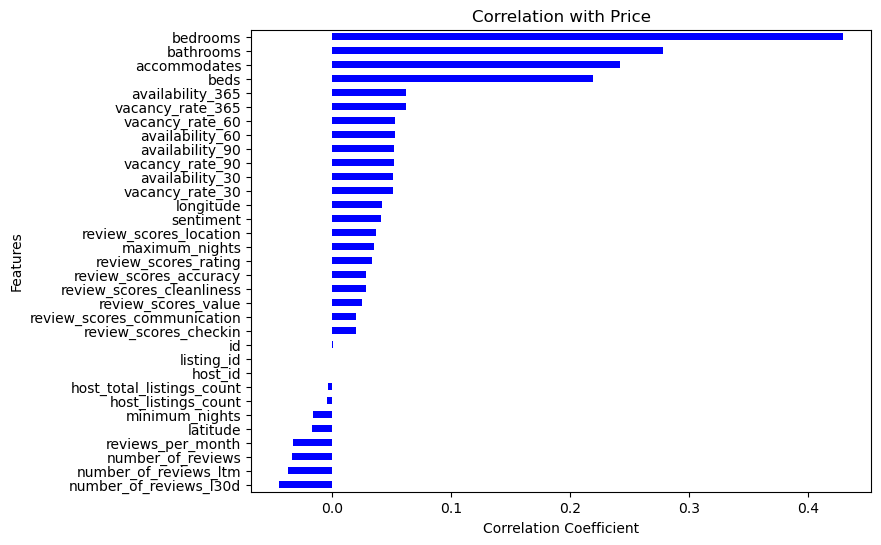

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for only numeric columns
correlation_matrix = listings_cleaned.select_dtypes(include='number').corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display the correlation matrix for price with other numerical columns as a bar plot
plt.figure(figsize=(8, 6))
correlation_matrix['price'].drop('price').sort_values().plot(kind='barh', color='blue')
plt.title('Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [94]:
listings_cleaned['bathrooms']

0        1.0
1        2.0
2        1.0
3        2.0
4        1.5
        ... 
18225    2.0
18226    2.0
18227    1.0
18228    1.0
18229    1.0
Name: bathrooms, Length: 18230, dtype: float64

/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

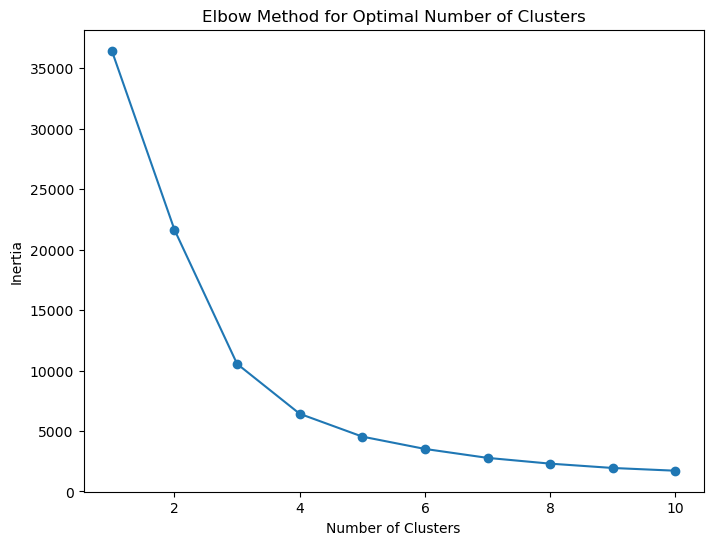

/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       id  host_id                  host_name  host_since  \
0   57818   275948                    Von Inc  2010-11-01   
1   69824   351303                      Tracy  2011-01-17   
2   83449   454736  Jon,  Mary Pop Apartments  2011-03-21   
3  105411   532930                      Sonia  2011-04-25   
4  129099   637272                     Bianca  2011-05-28   

             host_location  host_response_time host_response_rate  \
0            Hollywood, FL      within an hour               100%   
1        Silver Spring, MD      within an hour               100%   
2          Dania Beach, FL      within an hour               100%   
3    Southwest Ranches, FL      within an hour                80%   
4  Buenos Aires, Argentina  a few days or more                36%   

  host_acceptance_rate host_is_superhost  host_listings_count  \
0                  96%                 t                  3.0   
1                  50%                 f                  3.0   
2                  97% 

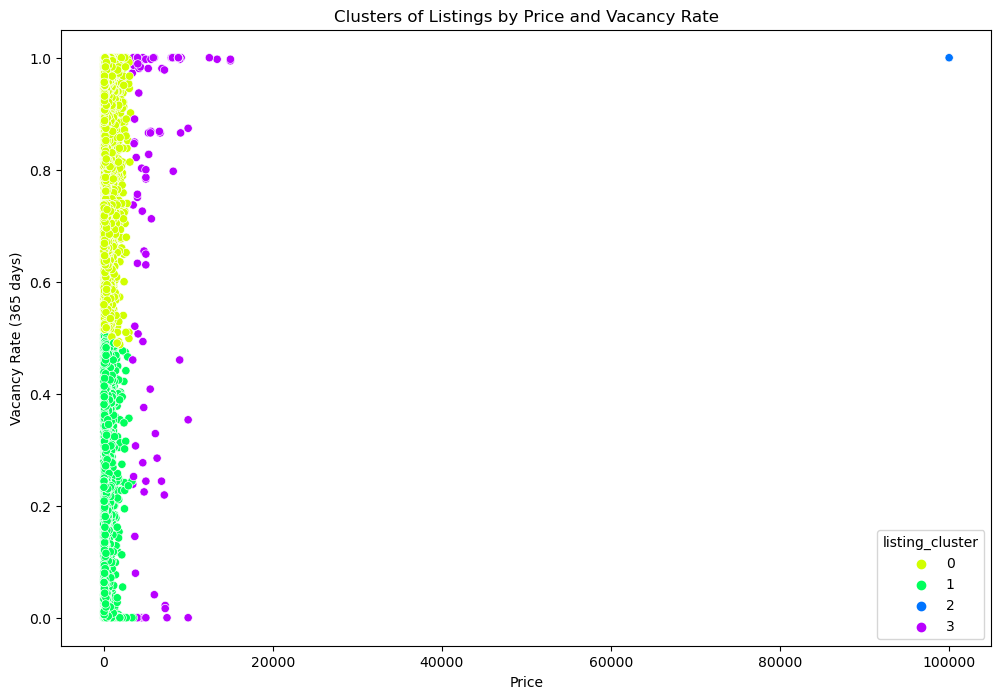

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing values
listings_cleaned['bathrooms'].fillna(listings_cleaned['bathrooms'].mean(), inplace=True)
listings_cleaned['beds'].fillna(listings_cleaned['beds'].mean(), inplace=True)
listings_cleaned['price'].fillna(listings_cleaned['price'].mean(), inplace=True)
listings_cleaned['availability_30'].fillna(listings_cleaned['availability_30'].mean(), inplace=True)
listings_cleaned['availability_60'].fillna(listings_cleaned['availability_60'].mean(), inplace=True)
listings_cleaned['availability_90'].fillna(listings_cleaned['availability_90'].mean(), inplace=True)
listings_cleaned['availability_365'].fillna(listings_cleaned['availability_365'].mean(), inplace=True)
listings_cleaned['review_scores_rating'].fillna(listings_cleaned['review_scores_rating'].mean(), inplace=True)
listings_cleaned['reviews_per_month'].fillna(listings_cleaned['reviews_per_month'].mean(), inplace=True)

# Select relevant features for clustering
features = ['price', 'vacancy_rate_365']

# Standardize the features
scaler = StandardScaler()
listings_scaled = scaler.fit_transform(listings_cleaned[features])

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(listings_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters and fit KMeans
optimal_clusters = 4  # Assuming 4 is the optimal number from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
listings_cleaned['listing_cluster'] = kmeans.fit_predict(listings_scaled)

# Display the first few rows with the cluster labels
print(listings_cleaned.head())

# Plot the clusters by price and vacancy_rate_365
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='price', y='vacancy_rate_365', hue='listing_cluster',
    palette=sns.color_palette('hsv', optimal_clusters), data=listings_cleaned
)
plt.title('Clusters of Listings by Price and Vacancy Rate')
plt.xlabel('Price')
plt.ylabel('Vacancy Rate (365 days)')
plt.show()


/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

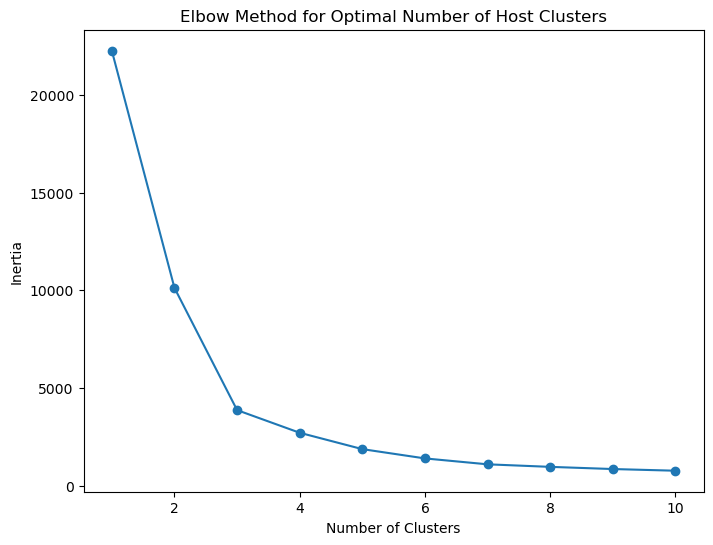

/Users/fjohnson35/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       id  host_id                  host_name  host_since  \
0   57818   275948                    Von Inc  2010-11-01   
1   69824   351303                      Tracy  2011-01-17   
2   83449   454736  Jon,  Mary Pop Apartments  2011-03-21   
3  105411   532930                      Sonia  2011-04-25   
4  129099   637272                     Bianca  2011-05-28   

             host_location  host_response_time host_response_rate  \
0            Hollywood, FL      within an hour               100%   
1        Silver Spring, MD      within an hour               100%   
2          Dania Beach, FL      within an hour               100%   
3    Southwest Ranches, FL      within an hour                80%   
4  Buenos Aires, Argentina  a few days or more                36%   

  host_acceptance_rate host_is_superhost  host_listings_count  \
0                  96%                 t                  3.0   
1                  50%                 f                  3.0   
2                  97% 

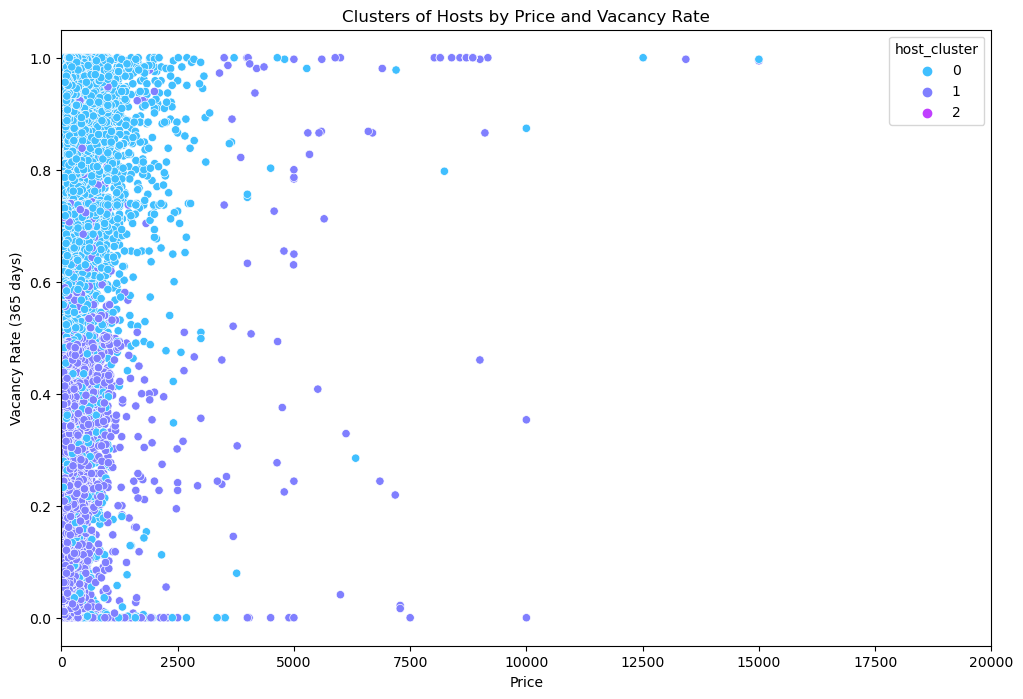

In [96]:
# Aggregate features by host
host_features = listings_cleaned.groupby('host_id').agg({
    'price': 'mean',
    'vacancy_rate_365': 'mean',
    'listing_cluster': 'mean'  # Average cluster label
}).reset_index()

# Standardize the host features
scaler = StandardScaler()
host_scaled = scaler.fit_transform(host_features.drop(columns=['host_id']))

# Determine the optimal number of clusters for hosts using the elbow method
host_inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(host_scaled)
    host_inertia.append(kmeans.inertia_)

# Plot the elbow curve for hosts
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), host_inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Host Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters for hosts and fit KMeans
optimal_host_clusters = 3  # Assuming 3 is the optimal number from the elbow plot
kmeans = KMeans(n_clusters=optimal_host_clusters, random_state=42)
host_features['host_cluster'] = kmeans.fit_predict(host_scaled)

# Drop any existing host_cluster column in listings_cleaned
if 'host_cluster' in listings_cleaned.columns:
    listings_cleaned = listings_cleaned.drop(columns=['host_cluster'])

# Merge the host cluster labels back to the listings_cleaned dataframe
listings_cleaned = listings_cleaned.merge(host_features[['host_id', 'host_cluster']], on='host_id', how='left')

# Display the first few rows with the host cluster labels
print(listings_cleaned.head())

# Plot the host clusters by price and vacancy_rate_365 with a limit on the price axis
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='price', y='vacancy_rate_365', hue='host_cluster',
    palette=sns.color_palette('cool', optimal_host_clusters), data=listings_cleaned
)
plt.title('Clusters of Hosts by Price and Vacancy Rate')
plt.xlabel('Price')
plt.ylabel('Vacancy Rate (365 days)')
plt.xlim(0, 20000)  # Set the x-axis limit to 20,000
plt.show()


In [ ]:
# Display unique values of the specified columns
unique_calculated_host_listings_count = listings_cleaned['calculated_host_listings_count'].unique()
unique_calculated_host_listings_count_entire_homes = listings_cleaned['calculated_host_listings_count_entire_homes'].unique()
unique_calculated_host_listings_count_private_rooms = listings_cleaned['calculated_host_listings_count_private_rooms'].unique()
unique_calculated_host_listings_count_shared_rooms = listings_cleaned['calculated_host_listings_count_shared_rooms'].unique()

print("Unique values for calculated_host_listings_count:")
print(unique_calculated_host_listings_count)
print("\nUnique values for calculated_host_listings_count_entire_homes:")
print(unique_calculated_host_listings_count_entire_homes)
print("\nUnique values for calculated_host_listings_count_private_rooms:")
print(unique_calculated_host_listings_count_private_rooms)
print("\nUnique values for calculated_host_listings_count_shared_rooms:")
print(unique_calculated_host_listings_count_shared_rooms)


Unique values for calculated_host_listings_count:
[  2  15   1   5   4  23  12   3  10   7   6  30  21  14   8   9  36  77
  50  16  11  13 177  20  31  39  18 137  27  32  56  40 106  25  42  44
  60  22  28 110  29  43  59  41  75  19  17  35  45  55  63 356  51  46
  34  26  38  24  84 118  62  73]

Unique values for calculated_host_listings_count_entire_homes:
[  2  15   1   5   4   0  23   3  10   7  30  21  11   8   9  36   6  77
  50  16  13 177  20  12  31  39 112  14  18  27  32  56  40 106  25  42
  44  60  22  28 109  17  59  41  75  19  35  45  43  55  63 353  51  46
  34  29  33 105  24  84  26 118]

Unique values for calculated_host_listings_count_private_rooms:
[ 0  2  1 12  3  4  5  6  8 25  7  9 11 23 21 16 10 15 22 35 56 42 14]

Unique values for calculated_host_listings_count_shared_rooms:
[ 0  1 11  2  6  5  4  3]


# **Scenario 4) You are a host and have a property listed in Broward market**  

4a) Where would you like your property be located ideally? -> _What location should you own a property to maximize daily revenue_   
4b) How much would you charge daily?  -> _What is the highest price you can justify charging for this property to maximize daily revenue?_  
4c) What’s the expected daily revenue per bedroom for your property? -> _(price x 30-day occupancy rate) / (# bedrooms)_  

  **Assumptions**  
    - Assume this hypothetical property has the same number of bedrooms as your current house  -> _1-2 bedrooms_  
    - Assume that you want to maximize the expected daily revenue per bedroom   
    - Ignore the cost of purchasing the property/tax/maintenance/cleaning etc.   


## **4a) _What location should you own a property to maximize income_**

Solution: Identify neighborhood with highest average daily price  
1) Group listings by neighborhood  
2) Calculate average daily price by neighborhood  
3) Calculate average vacancy rates by neighborhood
3) select neighbordhood with highest daily price and lowest vacancy rate 

In [182]:
listings_cleaned.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'vacancy_rate_30', 'vacancy_rate_60', 'vacancy_rate_90'

In [183]:
# Aggregate data per neighborhood
neighbourhoods_df = listings_cleaned.groupby('neighbourhood_cleansed').agg(
    price=('price', 'mean'),
    airbnb_count=('price', 'size'),
    vacancy_rate=('vacancy_rate_30', 'mean')
).reset_index()

# Round the price column
neighbourhoods_df['price'] = neighbourhoods_df['price'].round(0)

# Rename columns
neighbourhoods_df.columns = ['neighborhood', 'price', 'airbnb_count', 'vacancy_rate']

# Sort by price descending
neighbourhoods_df = neighbourhoods_df.sort_values('price', ascending=False)

neighbourhoods_df

,neighborhood,price,airbnb_count,vacancy_rate
15,Lighthouse Point,782.0,110,0.356667
26,Southwest Ranches,588.0,35,0.510476
22,Pembroke Pines,535.0,311,0.413719
20,Parkland,517.0,18,0.387037
23,Plantation,424.0,234,0.478063
11,Lauderdale By The Sea,417.0,444,0.333934
7,Fort Lauderdale,412.0,4612,0.406685
10,Hollywood,385.0,4497,0.415507
5,Davie,382.0,185,0.394595
1,Cooper City,341.0,27,0.362963


**Follow up: _Determine how vacancy rate is measured_**

In [184]:
# Aggregate data per neighborhood including multiple vacancy rates
neighbourhoods_df = listings_cleaned.groupby('neighbourhood_cleansed').agg(
    price=('price', 'mean'),
    airbnb_count=('price', 'size'),
    vacancy_rate_30=('vacancy_rate_30', 'mean'),
    vacancy_rate_60=('vacancy_rate_60', 'mean'),
    vacancy_rate_90=('vacancy_rate_90', 'mean'),
    vacancy_rate_365=('vacancy_rate_365', 'mean')
).reset_index()

# Round the price column
neighbourhoods_df['price'] = neighbourhoods_df['price'].round(0)

# Rename columns
neighbourhoods_df.columns = ['neighborhood', 'daily_price', 'airbnb_count', 'vacancy_rate_30', 'vacancy_rate_60', 'vacancy_rate_90', 'vacancy_rate_365']

# Sort by price descending
neighbourhoods_df = neighbourhoods_df.sort_values('daily_price', ascending=True)

neighbourhoods_df

,neighborhood,daily_price,airbnb_count,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365
12,Lauderdale Lakes,133.0,57,0.449123,0.517544,0.567057,0.479068
18,North Lauderdale,134.0,112,0.489286,0.572024,0.628770,0.502886
21,Pembroke Park,143.0,33,0.405051,0.441414,0.464983,0.299460
16,Margate,164.0,122,0.468306,0.511475,0.557923,0.565237
13,Lauderhill,165.0,127,0.378740,0.421522,0.451356,0.478244
27,Sunrise,175.0,221,0.443741,0.507843,0.557567,0.531941
28,Tamarac,186.0,87,0.463602,0.505556,0.538314,0.504078
17,Miramar,191.0,238,0.411345,0.479552,0.516900,0.455623
0,Coconut Creek,198.0,75,0.425778,0.493111,0.526074,0.484237
25,Sea Ranch Lakes,200.0,6,0.438889,0.450000,0.485185,0.650228


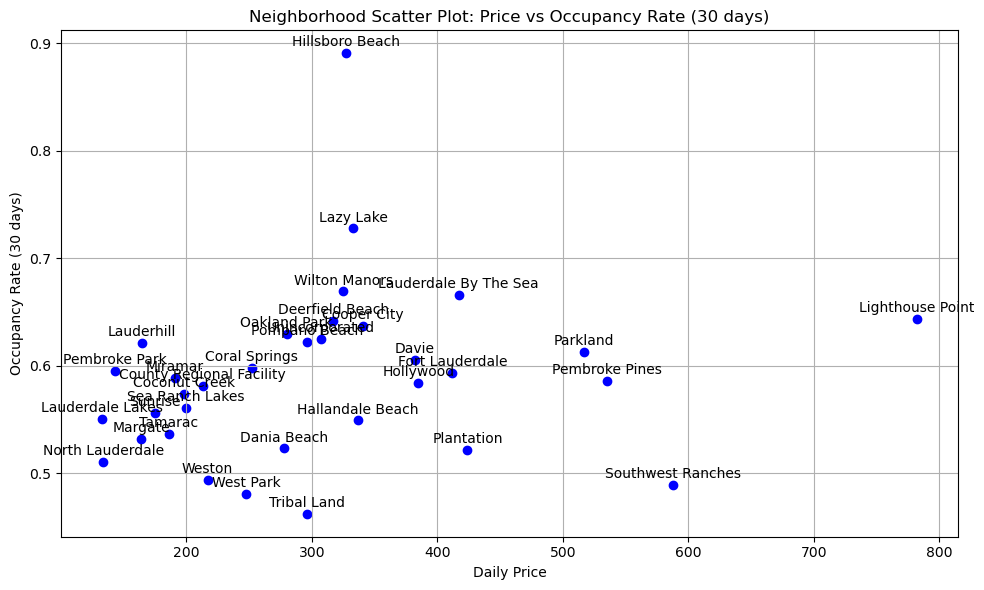

In [185]:
# Calculate occupancy rates for each duration
neighbourhoods_df['occupancy_rate_30'] = 1 - neighbourhoods_df['vacancy_rate_30']
neighbourhoods_df['occupancy_rate_60'] = 1 - neighbourhoods_df['vacancy_rate_60']
neighbourhoods_df['occupancy_rate_90'] = 1 - neighbourhoods_df['vacancy_rate_90']
neighbourhoods_df['occupancy_rate_365'] = 1 - neighbourhoods_df['vacancy_rate_365']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(neighbourhoods_df['daily_price'], neighbourhoods_df['occupancy_rate_30'], marker='o', color='blue')


# Adding labels and title
plt.xlabel('Daily Price')
plt.ylabel('Occupancy Rate (30 days)')
plt.title('Neighborhood Scatter Plot: Price vs Occupancy Rate (30 days)')

# Annotate each point with neighborhood name
for i in range(len(neighbourhoods_df)):
    plt.annotate(neighbourhoods_df['neighborhood'][i], 
                 (neighbourhoods_df['daily_price'][i], neighbourhoods_df['occupancy_rate_30'][i]),
                 textcoords="offset points", xytext=(0,5), ha='center')

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [192]:
neighbourhoods_df['yearly_revenue'] = (neighbourhoods_df['occupancy_rate_30'] * neighbourhoods_df['daily_price'] * 30 * 12).round()

neighbourhoods_df.drop(['vacancy_rate_30', 'vacancy_rate_60', 'vacancy_rate_90', 'vacancy_rate_365'], axis=1)

neighbourhoods_df.sort_values('yearly_revenue', ascending = False)



,neighborhood,daily_price,airbnb_count,vacancy_rate_30,vacancy_rate_60,vacancy_rate_90,vacancy_rate_365,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365,yearly_revenue
15,Lighthouse Point,782.0,110,0.356667,0.407576,0.446768,0.589365,0.643333,0.592424,0.553232,0.410635,181111.0
20,Parkland,517.0,18,0.387037,0.392593,0.430864,0.425571,0.612963,0.607407,0.569136,0.574429,114085.0
22,Pembroke Pines,535.0,311,0.413719,0.496195,0.551304,0.550156,0.586281,0.503805,0.448696,0.449844,112918.0
9,Hillsboro Beach,327.0,71,0.109390,0.115258,0.132081,0.287247,0.890610,0.884742,0.867919,0.712753,104843.0
26,Southwest Ranches,588.0,35,0.510476,0.579524,0.604444,0.585675,0.489524,0.420476,0.395556,0.414325,103622.0
11,Lauderdale By The Sea,417.0,444,0.333934,0.322072,0.344995,0.568222,0.666066,0.677928,0.655005,0.431778,99990.0
7,Fort Lauderdale,412.0,4612,0.406685,0.460310,0.502366,0.551875,0.593315,0.539690,0.497634,0.448125,88000.0
14,Lazy Lake,333.0,6,0.272222,0.350000,0.394444,0.550685,0.727778,0.650000,0.605556,0.449315,87246.0
5,Davie,382.0,185,0.394595,0.472432,0.524505,0.473247,0.605405,0.527568,0.475495,0.526753,83255.0
10,Hollywood,385.0,4497,0.415507,0.457183,0.509661,0.588261,0.584493,0.542817,0.490339,0.411739,81011.0


**Best Neighborhood to own an AirBnB**  

- Lighthouse Point is the best neighbourhood to own an AirBnB.  
  1) It has the highest average daily price by a wide margin ($782)
  2) It has one of the lowest 30-day vacancy rate / highest occupancy rates with a much higher daily price than other similar vacancy rate neighborhoods  
  3) It has the highest expected yearly revenue at over $180k per year ( (daily revenue x 30 x 12) x (30-day occupancy rate) ). the next highest is $114k per year



## 4b) **_What is the highest price you can justify charging for this property to maximize daily revenue?_**

In [239]:
lighthouse_point = listings_cleaned[listings_cleaned['neighbourhood_cleansed']=='Lighthouse Point']

# Calculate occupancy rates for each duration
lighthouse_point['occupancy_rate_30'] = 1 - lighthouse_point['vacancy_rate_30']
lighthouse_point['occupancy_rate_60'] = 1 - lighthouse_point['vacancy_rate_60']
lighthouse_point['occupancy_rate_90'] = 1 - lighthouse_point['vacancy_rate_90']
lighthouse_point['occupancy_rate_365'] = 1 - lighthouse_point['vacancy_rate_365']

lighthouse_point.drop(['host_name', 'host_since', 'host_location', 'host_response_time', 'host_identity_verified', 
                       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                       'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic',
                       'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 
                       'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 
                       'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 
                       'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                       'review_scores_communication', 'review_scores_value', 'vacancy_rate_30', 'vacancy_rate_60',
                       'vacancy_rate_90', 'vacancy_rate_365','listing_cluster', 'host_cluster',
                       'instant_bookable', 'reviews_per_month', 'bathrooms', 'listing_id', 'sentiment', 'bedrooms', 
                       ], axis=1, inplace=True)

/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_55491/4097212538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lighthouse_point['occupancy_rate_30'] = 1 - lighthouse_point['vacancy_rate_30']
/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_55491/4097212538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lighthouse_point['occupancy_rate_60'] = 1 - lighthouse_point['vacancy_rate_60']
/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_55491/4097212538.py:6: SettingWithCop

In [227]:
LHP_stays = lighthouse_point.groupby('room_type').agg(
    avg_price = ('price', 'mean'),
    bnb_count =('id', 'size')
)

LHP_stays

,avg_price,bnb_count
room_type,,
Entire home/apt,820.441602,104
Private room,106.987760,6


In [228]:
pip install folium

DEPRECATION: Loading egg at /Users/fjohnson35/anaconda3/lib/python3.11/site-packages/mask_rcnn_tf2-1.5.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/fjohnson35/anaconda3/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [229]:
import folium 

# Initialize a map centered around the first point
map_center = [lighthouse_point['latitude'].mean(), lighthouse_point['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add a marker for each latitude and longitude in the dataframe
for _, row in lighthouse_point.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['neighbourhood_cleansed']
    ).add_to(m)

# Display the map in the Jupyter Notebook
m

In [230]:
# Initialize a map centered around the first point
map_center = [lighthouse_point['latitude'].mean(), lighthouse_point['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add a marker for each latitude and longitude in the dataframe with price annotation
for _, row in lighthouse_point.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Price: ${row['price']}"
    ).add_to(m)

# Display the map in the Jupyter Notebook
m

In [233]:
from folium.plugins import HeatMap

# Aggregate data to calculate the average price at each location
avg_price_data = lighthouse_point.groupby(['latitude', 'longitude']).price.mean().reset_index()

# Initialize a map centered around the average coordinates
map_center = [avg_price_data['latitude'].mean(), avg_price_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Prepare data for the heatmap
heat_data = avg_price_data[['latitude', 'longitude', 'price']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)

# Display the map in the Jupyter Notebook
m

/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_55491/970541748.py:14: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)


In [234]:

# Aggregate data to calculate the average price at each location
avg_price_data = lighthouse_point.groupby(['latitude', 'longitude']).price.mean().reset_index()

# Initialize a map centered around the average coordinates
map_center = [avg_price_data['latitude'].mean(), avg_price_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Prepare data for the heatmap
heat_data = avg_price_data[['latitude', 'longitude', 'price']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)

# Add a marker for each latitude and longitude in the dataframe with price annotation
for _, row in lighthouse_point.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Price: ${row['price']}"
    ).add_to(m)

# Display the map in the Jupyter Notebook
m

/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_55491/3947014568.py:14: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)


In [254]:
lighthouse_point.sort_values(['accommodates'], ascending = True).head(10)

,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,review_scores_location,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90,occupancy_rate_365
258,6231165,22267267,Lighthouse Point,26.266630,-80.098070,Private room,1,1 shared bath,1.00000,43.000000,4.64,0.233333,0.116667,0.077778,0.772603
11150,750634742597457481,462767395,Lighthouse Point,26.294830,-80.088650,Private room,1,1 private bath,1.00000,52.000000,5.00,0.800000,0.400000,0.266667,0.789041
15181,939868981375058115,241573462,Lighthouse Point,26.267780,-80.093470,Private room,2,1 bath,1.00000,356.926562,NaN,0.233333,0.116667,0.077778,0.772603
13376,858179819416014281,507700009,Lighthouse Point,26.282710,-80.094370,Private room,2,1 private bath,1.00000,45.000000,5.00,1.000000,0.533333,0.355556,0.841096
10348,704270742031230684,375414708,Lighthouse Point,26.275944,-80.091512,Private room,2,1 private bath,1.00000,75.000000,5.00,0.633333,0.516667,0.422222,0.375342
18219,1052916669495290978,27657821,Lighthouse Point,26.277007,-80.093963,Private room,2,1 bath,2.92533,70.000000,NaN,0.100000,0.050000,0.033333,0.268493
8333,582388523345921155,302851728,Lighthouse Point,26.282820,-80.093760,Entire home/apt,4,1 bath,2.00000,156.000000,4.68,0.100000,0.050000,0.033333,0.326027
8498,593606973632131680,451868275,Lighthouse Point,26.263840,-80.098480,Entire home/apt,4,1 bath,2.00000,117.000000,4.96,1.000000,1.000000,1.000000,0.583562
8544,596907447198317642,51260536,Lighthouse Point,26.296130,-80.085680,Entire home/apt,4,2 baths,4.00000,213.000000,4.90,0.900000,0.950000,0.944444,0.293151
8613,600592013309929025,302851728,Lighthouse Point,26.280890,-80.095440,Entire home/apt,4,1 bath,2.00000,188.000000,4.84,0.533333,0.533333,0.366667,0.413699


In [1]:

two_three_bnbs = lighthouse_point[lighthouse_point['accommodates'].isin([1,2])].sort_values('price')

print(f'Average price for BnBs accommodating 1 or 2 guests')
two_three_bnbs


NameError: name 'lighthouse_point' is not defined

In [260]:

# Aggregate data to calculate the average price at each location
avg_price_data = two_three_bnbs.groupby(['latitude', 'longitude']).price.mean().reset_index()

# Initialize a map centered around the average coordinates
map_center = [avg_price_data['latitude'].mean(), avg_price_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Prepare data for the heatmap
heat_data = avg_price_data[['latitude', 'longitude', 'price']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)

# Add a marker for each latitude and longitude in the dataframe with price annotation
for _, row in two_three_bnbs.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Price: ${row['price']}"
    ).add_to(m)

# Display the map in the Jupyter Notebook
m

/var/folders/8l/wfcnp0896lb8kt5vxf_y7dqr0000gn/T/ipykernel_55491/2852458369.py:12: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, max_val=avg_price_data['price'].max()).add_to(m)


**Next**  
1) Redo analysis of best area to purchase an AirBnB focusing on properties accommodating 2 or less people
   - Lighthouse Point has a lot of highly priced, large houses that skew initial analysis